In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # ÏúàÎèÑÏö∞Ïö© ÌïúÍ∏Ä Ìè∞Ìä∏
plt.rcParams['axes.unicode_minus'] = False     # ÎßàÏù¥ÎÑàÏä§ Î∂ÄÌò∏ Íπ®Ïßê Î∞©ÏßÄ

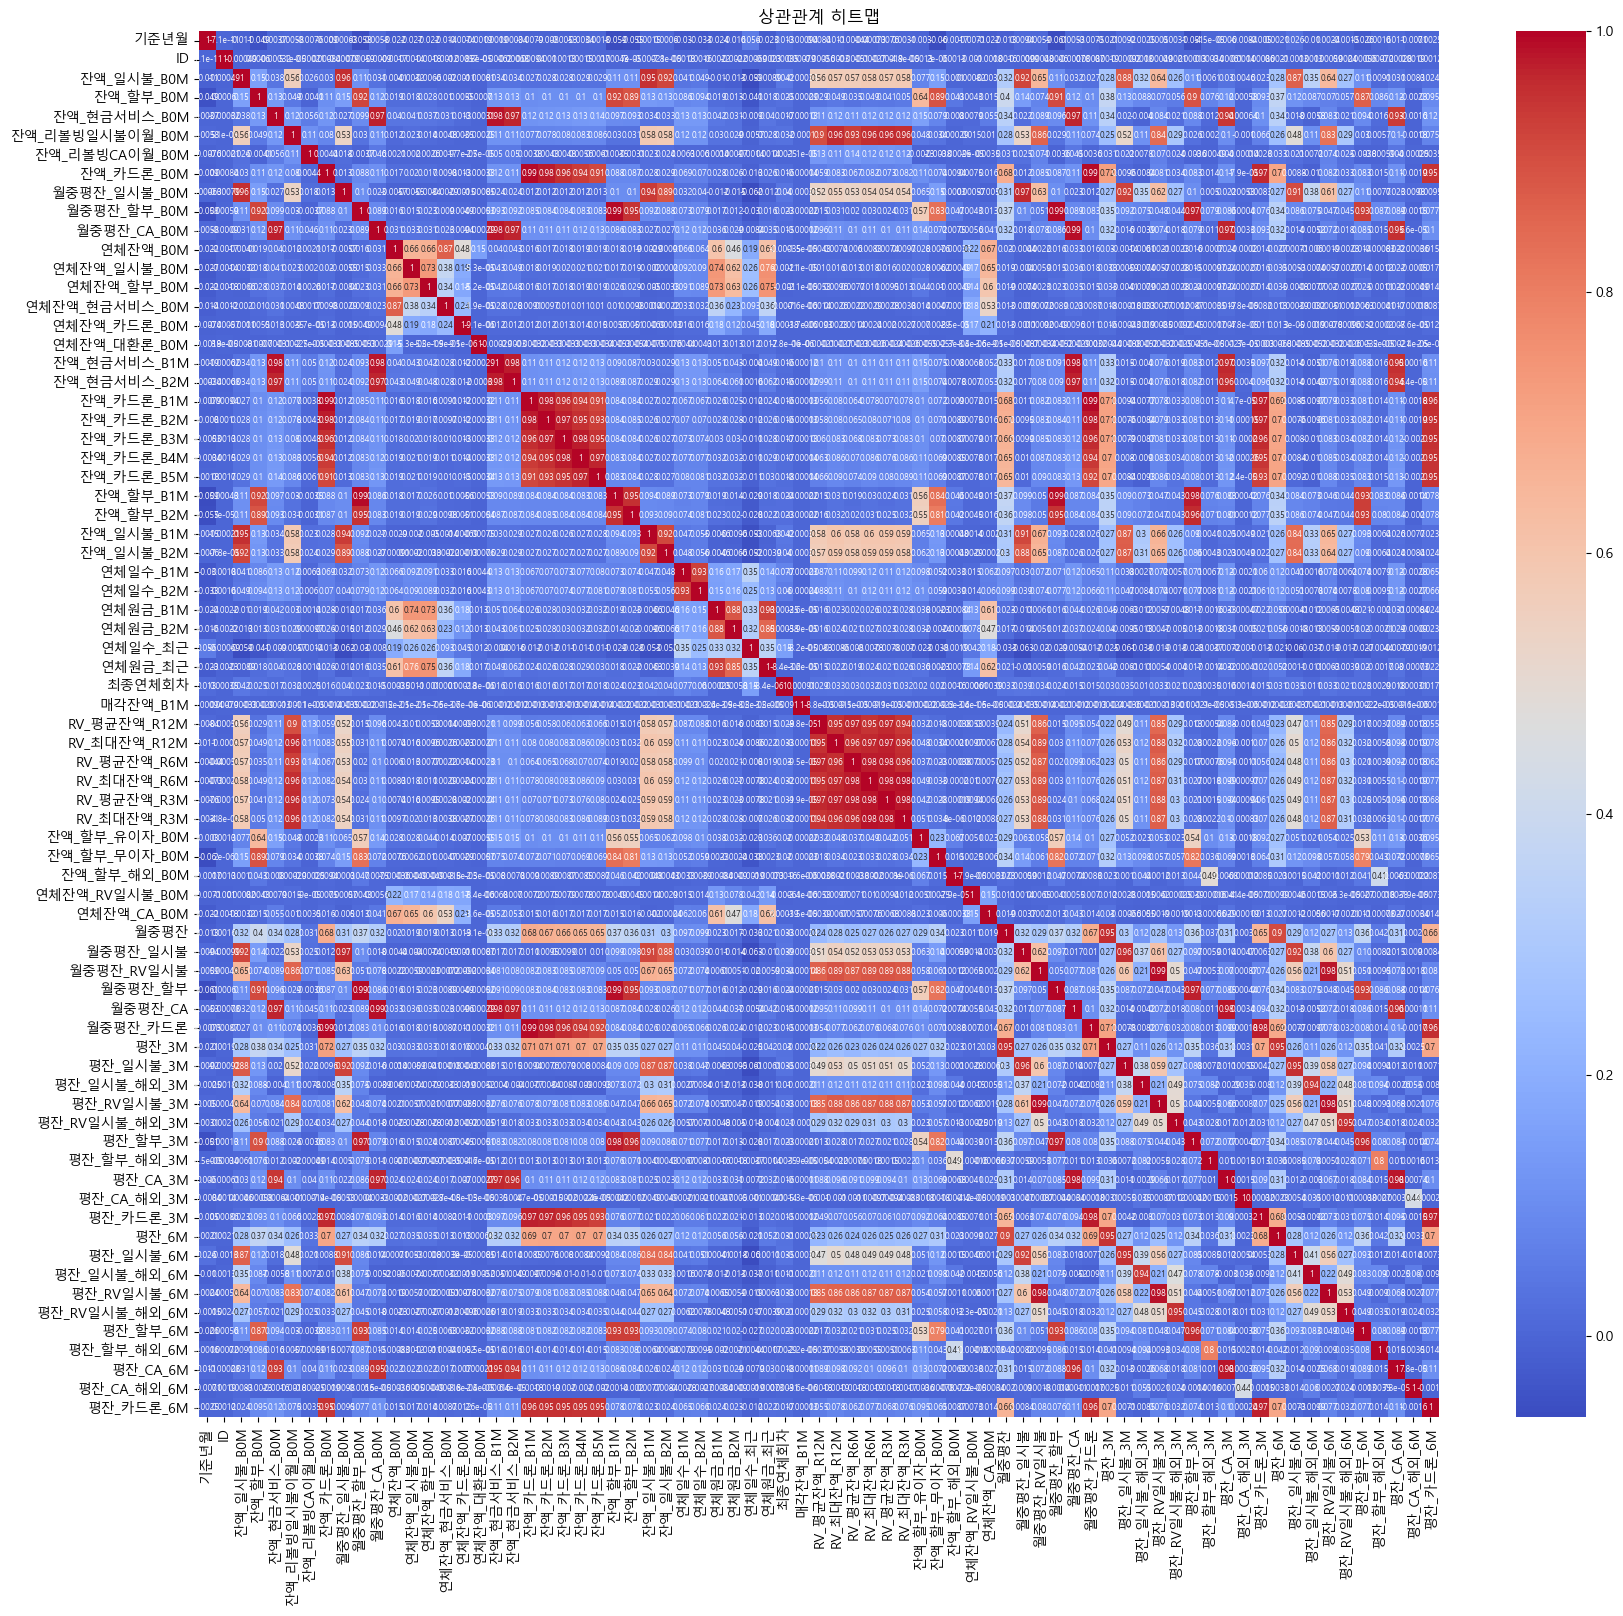

In [6]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù ÏãúÍ∞ÅÌôî

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Îç∞Ïù¥ÌÑ∞ load
df = pd.read_parquet("open/train/5.ÏûîÏï°Ï†ïÎ≥¥/ÏûîÏï°Ï†ïÎ≥¥ ÏõîÎ≥Ñ Ìï©Î≥∏_Ï†ÑÏ≤òÎ¶¨.parquet")

# Î≥µÏÇ¨Î≥∏ ÏÉùÏÑ±
df_corr = df.copy()

# Label Encoding
for col in df_corr.select_dtypes(include=['object', 'category']).columns:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col].astype(str))

# float64 ‚Üí float32 Î≥ÄÌôò
for col in df_corr.select_dtypes(include='float64').columns:
    df_corr[col] = df_corr[col].astype('float32')

# int64 ‚Üí int32 Î≥ÄÌôò
for col in df_corr.select_dtypes(include='int64').columns:
    df_corr[col] = df_corr[col].astype('int32')

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌñâÎ†¨ Í≥ÑÏÇ∞
corr_matrix = df_corr.corr()

# ÏãúÍ∞ÅÌôî (ÏòµÏÖò)
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6})
plt.title("ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ")
plt.show()

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df_corr.select_dtypes(include='number').dropna()

X_const = add_constant(X)

# VIF
vif_df = pd.DataFrame()
vif_df["Î≥ÄÏàòÎ™Ö"] = X_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

vif_df = vif_df.sort_values("VIF", ascending=False)
print(vif_df)

C:\Users\dlxod\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


KeyboardInterrupt: 

In [6]:
import numpy as np
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_corr.select_dtypes(include='number')
X = X.loc[:, X.nunique() > 1]  # Î≥ÄÎèô ÏóÜÎäî Ïó¥ Ï†úÍ±∞
X = X.dropna()
X_const = add_constant(X)

vif_values = []
for i in range(X_const.shape[1]):
    try:
        vif = variance_inflation_factor(X_const.values, i)
    except Exception:
        vif = np.nan
    vif_values.append(vif)

vif_df = pd.DataFrame({
    "Î≥ÄÏàòÎ™Ö": X_const.columns,
    "VIF": vif_values
}).sort_values("VIF", ascending=False)

print(vif_df)

C:\Users\dlxod\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


KeyboardInterrupt: 

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np
import pandas as pd

X = df_corr.select_dtypes(include='number')
X = X.loc[:, X.nunique() > 1]  # Î≥ÄÎèôÏù¥ ÏóÜÎäî Ïó¥ Ï†úÍ±∞
X = X.dropna()

X_const = add_constant(X)

vif_list = []
problem_vars = []

for i in range(X_const.shape[1]):
    var_name = X_const.columns[i]
    try:
        vif = variance_inflation_factor(X_const.values, i)
    except Exception as e:
        vif = np.nan
        problem_vars.append((var_name, str(e)))
    vif_list.append(vif)

vif_df = pd.DataFrame({
    "Î≥ÄÏàòÎ™Ö": X_const.columns,
    "VIF": vif_list
}).sort_values("VIF", ascending=False)

print("VIF Í≤∞Í≥º:")
print(vif_df)

if problem_vars:
    print("\nÏò§Î•ò Î∞úÏÉù Î≥ÄÏàò Î∞è Ïù¥Ïú†:")
    for var, reason in problem_vars:
        print(f"{var}: {reason}")

VIF Í≤∞Í≥º:
            Î≥ÄÏàòÎ™Ö  VIF
0         const  NaN
1          Í∏∞Ï§ÄÎÖÑÏõî  NaN
2            ID  NaN
3    ÏûîÏï°_ÏùºÏãúÎ∂à_B0M  NaN
4     ÏûîÏï°_Ìï†Î∂Ä_B0M  NaN
..          ...  ...
69     ÌèâÏûî_Ìï†Î∂Ä_6M  NaN
70  ÌèâÏûî_Ìï†Î∂Ä_Ìï¥Ïô∏_6M  NaN
71     ÌèâÏûî_CA_6M  NaN
72  ÌèâÏûî_CA_Ìï¥Ïô∏_6M  NaN
73    ÌèâÏûî_Ïπ¥ÎìúÎ°†_6M  NaN

[74 rows x 2 columns]

Ïò§Î•ò Î∞úÏÉù Î≥ÄÏàò Î∞è Ïù¥Ïú†:
const: Unable to allocate 1.32 GiB for an array with shape (2400000, 74) and data type float64
Í∏∞Ï§ÄÎÖÑÏõî: Unable to allocate 1.31 GiB for an array with shape (2400000, 73) and data type float64
ID: Unable to allocate 1.31 GiB for an array with shape (2400000, 73) and data type float64
ÏûîÏï°_ÏùºÏãúÎ∂à_B0M: Unable to allocate 1.31 GiB for an array with shape (2400000, 73) and data type float64
ÏûîÏï°_Ìï†Î∂Ä_B0M: Unable to allocate 1.31 GiB for an array with shape (2400000, 73) and data type float64
ÏûîÏï°_ÌòÑÍ∏àÏÑúÎπÑÏä§_B0M: Unable to allocate 1.31 GiB for an array with shape (2400000, 73) and d

In [8]:
import pandas as pd
import numpy as np
from statsmodels.api import OLS, add_constant

# ÏàòÏπòÌòï Ïó¥Îßå ÏÑ†ÌÉù
X = df_corr.select_dtypes(include='number')
X = X.loc[:, X.nunique() > 1].dropna()  # ÏÉÅÏàòÏó¥ Ï†úÍ±∞, Í≤∞Ï∏° Ï†úÍ±∞

problem_cols = []

for target_col in X.columns:
    try:
        y = X[target_col]
        X_others = X.drop(columns=[target_col])
        X_others_const = add_constant(X_others)

        model = OLS(y, X_others_const).fit()
        r2 = model.rsquared

        # R¬≤ == 1 ÎòêÎäî TSSÍ∞Ä Í±∞Ïùò 0Ïù¥Î©¥ Î¨∏Ï†úÎ°ú ÌåêÎã®
        if np.isclose(r2, 1.0) or np.isclose(np.var(y), 0):
            problem_cols.append((target_col, r2))
    except Exception as e:
        problem_cols.append((target_col, f"Error: {e}"))

# Í≤∞Í≥º Ï∂úÎ†•
print("üîç VIF ‚àû ÎòêÎäî divide by zero Ïú†Î∞ú Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎäî Ïó¥:")
for col, r2 in problem_cols:
    print(f"{col}: R¬≤ = {r2}")

üîç VIF ‚àû ÎòêÎäî divide by zero Ïú†Î∞ú Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎäî Ïó¥:
Í∏∞Ï§ÄÎÖÑÏõî: R¬≤ = Error: Unable to allocate 1.31 GiB for an array with shape (2400000, 73) and data type float64
ID: R¬≤ = Error: Unable to allocate 1.31 GiB for an array with shape (2400000, 73) and data type float64
ÏûîÏï°_ÏùºÏãúÎ∂à_B0M: R¬≤ = Error: Unable to allocate 1.31 GiB for an array with shape (2400000, 73) and data type float64
ÏûîÏï°_Ìï†Î∂Ä_B0M: R¬≤ = Error: Unable to allocate 1.31 GiB for an array with shape (2400000, 73) and data type float64
ÏûîÏï°_ÌòÑÍ∏àÏÑúÎπÑÏä§_B0M: R¬≤ = Error: Unable to allocate 1.31 GiB for an array with shape (2400000, 73) and data type float64
ÏûîÏï°_Î¶¨Î≥ºÎπôÏùºÏãúÎ∂àÏù¥Ïõî_B0M: R¬≤ = Error: Unable to allocate 1.31 GiB for an array with shape (2400000, 73) and data type float64
ÏûîÏï°_Î¶¨Î≥ºÎπôCAÏù¥Ïõî_B0M: R¬≤ = Error: Unable to allocate 1.31 GiB for an array with shape (2400000, 73) and data type float64
ÏûîÏï°_Ïπ¥ÎìúÎ°†_B0M: R¬≤ = Error: Unable to allocate 1.31 GiB for an ar